In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb

In [2]:
df = pd.read_csv('/Users/haoli/Downloads/df_for_modeling.csv')

In [3]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,annual_inc,...,addr_state_freq,earliest_cr_line_len,f,w,months_to_last_pymnt,months_to_last_credit_pull,Individual,Joint App,N,Y
0,75710736,12800.0,12800.0,12800.0,11.99,425.09,3,31,6,53000.0,...,21752,177,0,1,44,45,1,0,1,0
1,76143686,9000.0,9000.0,9000.0,15.31,313.36,3,35,9,52000.0,...,40051,205,0,1,21,41,1,0,1,0
2,76143234,8000.0,8000.0,8000.0,10.75,260.97,2,24,5,73000.0,...,40051,143,0,1,45,43,1,0,1,0
3,75943579,20000.0,20000.0,20000.0,12.99,673.79,3,32,10,58000.0,...,7762,151,0,1,14,47,1,0,1,0
4,75169662,6000.0,6000.0,6000.0,7.39,186.34,1,14,3,72000.0,...,21752,98,0,1,21,21,1,0,1,0


In [4]:
df.drop('id', axis = 1, inplace = True)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
df_train = df[df['issued_mark'] == 0]

In [7]:
df_test = df[df['issued_mark'] == 1]

In [8]:
df_train.shape

(235720, 114)

In [9]:
df_test.shape

(53118, 114)

In [10]:
df_train.drop('issued_mark', axis = 1, inplace = True)
df_test.drop('issued_mark', axis = 1, inplace = True)

/Users/haoli/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
df_train_X = df_train.drop('y', axis = 1)
df_train_Y = df_train['y']

In [12]:
df_test_X = df_test.drop('y', axis = 1)
df_test_Y = df_test['y']

In [25]:
train_model_x, train_valid_x, train_model_y, train_valid_y = train_test_split(df_train_X, df_train_Y, 
                                                                              train_size = 0.75)

In [29]:
dtrain = xgb.DMatrix(train_model_x, train_model_y)
dvalid = xgb.DMatrix(train_valid_x, train_valid_y)
dtest = xgb.DMatrix(df_test_X, df_test_Y)

In [30]:
params = {"objective": "binary:logistic", 
          "booster" : "gbtree", 
          "eta": 0.05, 
          "max_depth": 6, 
          "subsample": 0.632, 
          "colsample_bytree": 0.7,
          #"colsample_bylevel": 0.6,
          "silent": 1, 
          "seed": 1234, 
          "eval_metric": "auc",
          #"gamma": 1, 
          "min_child_weight": 5} 

In [31]:
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
num_boost_round = 1500
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist,\
  early_stopping_rounds= 50)

[0]	train-auc:0.983126	eval-auc:0.983543
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 50 rounds.
[1]	train-auc:0.990037	eval-auc:0.990013
[2]	train-auc:0.990105	eval-auc:0.990017
[3]	train-auc:0.991293	eval-auc:0.990839
[4]	train-auc:0.991729	eval-auc:0.991293
[5]	train-auc:0.991638	eval-auc:0.991258
[6]	train-auc:0.991758	eval-auc:0.991414
[7]	train-auc:0.992425	eval-auc:0.992269
[8]	train-auc:0.99241	eval-auc:0.992252
[9]	train-auc:0.992393	eval-auc:0.992245
[10]	train-auc:0.993971	eval-auc:0.993892
[11]	train-auc:0.994527	eval-auc:0.994481
[12]	train-auc:0.994438	eval-auc:0.994389
[13]	train-auc:0.994448	eval-auc:0.994402
[14]	train-auc:0.994461	eval-auc:0.994346
[15]	train-auc:0.997021	eval-auc:0.99709
[16]	train-auc:0.997078	eval-auc:0.997143
[17]	train-auc:0.997091	eval-auc:0.997122
[18]	train-auc:0.997076	eval-auc:0.99711
[19]	train-auc:0.997745	eval-auc:0.997754
[20]	train-auc:0.997794	eval-auc

[191]	train-auc:0.999937	eval-auc:0.999774
[192]	train-auc:0.999938	eval-auc:0.999774
[193]	train-auc:0.999939	eval-auc:0.999775
[194]	train-auc:0.99994	eval-auc:0.999781
[195]	train-auc:0.999941	eval-auc:0.999781
[196]	train-auc:0.999941	eval-auc:0.999782
[197]	train-auc:0.999942	eval-auc:0.999781
[198]	train-auc:0.999943	eval-auc:0.999782
[199]	train-auc:0.999944	eval-auc:0.999784
[200]	train-auc:0.999944	eval-auc:0.999784
[201]	train-auc:0.999944	eval-auc:0.999787
[202]	train-auc:0.999946	eval-auc:0.999791
[203]	train-auc:0.999946	eval-auc:0.999791
[204]	train-auc:0.999947	eval-auc:0.999792
[205]	train-auc:0.999947	eval-auc:0.999795
[206]	train-auc:0.999948	eval-auc:0.999795
[207]	train-auc:0.999949	eval-auc:0.999796
[208]	train-auc:0.999949	eval-auc:0.999798
[209]	train-auc:0.99995	eval-auc:0.999798
[210]	train-auc:0.99995	eval-auc:0.999798
[211]	train-auc:0.99995	eval-auc:0.999798
[212]	train-auc:0.999952	eval-auc:0.999801
[213]	train-auc:0.999952	eval-auc:0.999802
[214]	train-auc

[383]	train-auc:0.999997	eval-auc:0.999861
[384]	train-auc:0.999997	eval-auc:0.999861
[385]	train-auc:0.999997	eval-auc:0.999862
[386]	train-auc:0.999997	eval-auc:0.999862
[387]	train-auc:0.999997	eval-auc:0.999863
[388]	train-auc:0.999997	eval-auc:0.999862
[389]	train-auc:0.999997	eval-auc:0.999862
[390]	train-auc:0.999997	eval-auc:0.999863
[391]	train-auc:0.999997	eval-auc:0.999863
[392]	train-auc:0.999997	eval-auc:0.999863
[393]	train-auc:0.999997	eval-auc:0.999863
[394]	train-auc:0.999997	eval-auc:0.999863
[395]	train-auc:0.999997	eval-auc:0.999862
[396]	train-auc:0.999997	eval-auc:0.999862
[397]	train-auc:0.999997	eval-auc:0.999863
[398]	train-auc:0.999997	eval-auc:0.999863
[399]	train-auc:0.999997	eval-auc:0.999864
[400]	train-auc:0.999997	eval-auc:0.999864
[401]	train-auc:0.999998	eval-auc:0.999866
[402]	train-auc:0.999998	eval-auc:0.999866
[403]	train-auc:0.999998	eval-auc:0.999866
[404]	train-auc:0.999998	eval-auc:0.999865
[405]	train-auc:0.999998	eval-auc:0.999864
[406]	train

In [26]:
len(train_model_x)


176790

In [27]:
len(train_valid_x)

58930

In [32]:
len(train_model_y)

176790

In [33]:
importance=gbm.get_fscore()
df_importance = pd.DataFrame(importance.items(), columns=['feature', 'fscore'])
df_importance['fscore'] = df_importance['fscore'] / df_importance['fscore'].sum()

In [34]:
df_importance.sort_values(['fscore'], ascending=False, inplace=True)
df_importance

,feature,fscore
2,total_rec_prncp,0.145846
10,last_pymnt_amnt,0.072663
3,loan_amnt,0.049865
7,months_to_last_pymnt,0.048407
9,last_fico_range_high,0.048095
...,...,...
88,w,0.000416
94,Verified,0.000312
95,num_accts_ever_120_pd,0.000312
96,Not Verified,0.000104


In [36]:
import matplotlib.pyplot as plt

<Figure size 2304x2304 with 0 Axes>

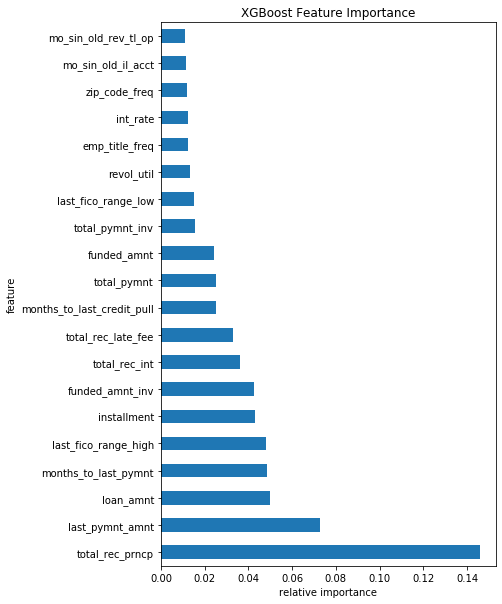

In [37]:
plt.figure(figsize=(32, 32))
# df_importance.plot()
df_importance[:20].plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')